<h2 align="center"> Task 1: Prediction Using Supervised ML </h2>
<h4 align="center"> Preet Kothari </h4>
<h3 align="center"> The Sparks Fundation - GRIP </h3>

* Problem: Predict the percentage of a student based on the number of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?
* The dataset can be found at: http://bit.ly/w-data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
%matplotlib inline

### Data Extraction and Preprocessing


Pandas provides the function **read_csv** which can be used to read csv files and import the data from both the local memory and any link to csv over the internet.

In [2]:
dataset = pd.read_csv('http://bit.ly/w-data')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Generating the descriptive statistics
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#Checking for any null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data visualisation


Plotting our data points on 2-D graph gives us a basic idea of what trend the data follows. With the help of visualizations we eyeball our dataset and see if we can manually find any relationship between the data.

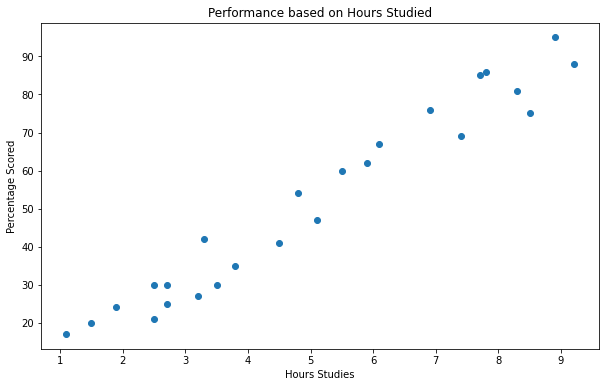

In [5]:
fig = plt.figure(figsize = (10,6))
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Scored')
plt.title('Performance based on Hours Studied')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Data Preparation

The next step is to divide the data into "features" (inputs) and "labels" (outputs).

In [6]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values
print(X.shape, Y.shape)

(25, 1) (25,)


Now after getting features and lables, we can split the dataset into train and test sets. The train set size will be 80% of the original dataset and the test set will be the remaining data, i.e., 20% of the original dataset

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.8, random_state = 0)
#set random state to get same or consistent(reproducible) results
print("Train Size =",X_train.size,"\nTest Size =",X_test.size)

Train Size = 20 
Test Size = 5


### Linear Regression Model

We will train the linear regression model on the train set and then predict the lables for the test data.

In [8]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [9]:
Y_pred = model.predict(X_test)

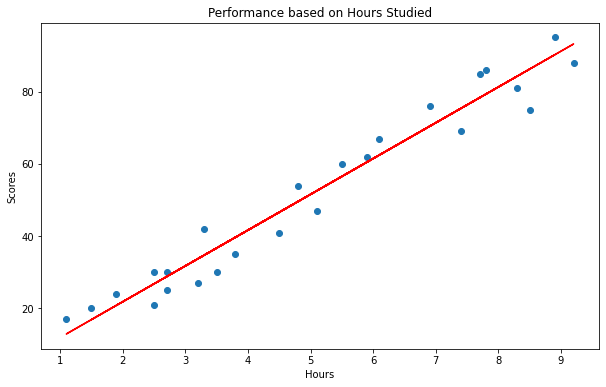

In [10]:
fig = plt.figure(figsize = (10,6))
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.plot(X, ((X*model.coef_) + model.intercept_), color = 'red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Performance based on Hours Studied')
plt.show()

From the above graph, it is evident that the model is giving a well generalised prediction. A similar conclusion can be derived from the table below, which shows that the predicted and the actual values a quite close. 

In [11]:
Data_y = pd.DataFrame({'Predicted':Y_pred,'Actual':Y_test})
Data_y

,Predicted,Actual
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


### Model Evaluation

Evaluating the performance of the algorithm is particularly important to compare how well different algorithms perform on a particular dataset. The simplest metric is the **Mean Absolute Error or M.A.E.**. The lower the M.A.E. the better is the model performance. There are many such metrics.

In [12]:
print('MAE:', mean_absolute_error(Y_test, Y_pred)) 

MAE: 4.183859899002975


### Problem Solution

Using the above linear regression model we will predict the approximate scores if a student studies for 9.25 hrs/day. 

In [13]:
Score = model.predict(np.array(9.5).reshape(1,1))
print("Average Score Predicted by algorithm for a student who studies 9.5 hrs = {}%".format(round(Score[0],2)))

Average Score Predicted by algorithm for a student who studies 9.5 hrs = 96.17%
